In [6]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Activation functions

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def cosine(x):
    return np.cos(x)

def gaussian(x):
    return np.exp(-((x**2)/2))

In [8]:
# activations_list = [sigmoid,tanh,cosine,gaussian]
# act_dict = {0.1:sigmoid, 0.2:tanh, 0.3:cosine, 0.4:gaussian}

### Testing activation functions

In [9]:
test_inputs = np.arange(-10,10,0.01)

Text(0.5, 1.0, 'Gaussian')

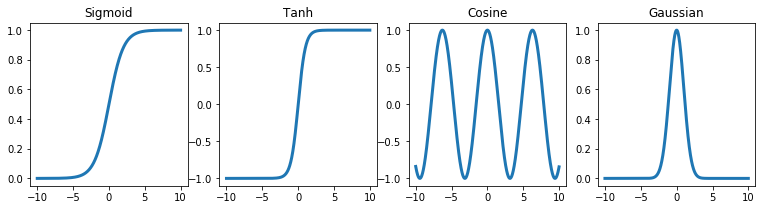

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,3))
axes[0].plot(test_inputs,sigmoid(test_inputs),linewidth=3)
axes[0].set_title("Sigmoid")
axes[1].plot(test_inputs,tanh(test_inputs),linewidth=3)
axes[1].set_title("Tanh")
axes[2].plot(test_inputs,cosine(test_inputs),linewidth=3)
axes[2].set_title("Cosine")
axes[3].plot(test_inputs,gaussian(test_inputs),linewidth=3)
axes[3].set_title("Gaussian")

## Inputs & Outputs

In [11]:
df = pd.read_csv("Data/1in_linear.txt", sep="\t", header=None)
df.columns = ["x","y"]
x = df["x"]
y = df["y"]

df.head()

,x,y
0,-1.00,-1.00
1,-0.98,-0.98
2,-0.96,-0.96
3,-0.94,-0.94
4,-0.92,-0.92


In [12]:
data = np.loadtxt("Data/1in_tanh.txt")
data.shape

(101, 2)

In [21]:
imput = data[:, :1] 
output = data[:, 1:]
imput.shape, output

((101, 1), array([[-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-1.    ],
        [-0.9999],
        [-0.9999],
        [-0.9999],
        [-0.9998],
        [-0.9997],
        [-0.9996],
        [-0.9993],
        [-0.999 ],
        [-0.9985],
        [-0.9978],
        [-0.9967],
        [-0.9951],
        [-0.9926],
        [-0.989 ],
        [-0.9837],
        [-0.9757],
        [-0.964 ],
        [-0.9468],
        [-0.9217],
        [-0.8854],
        [-0.8337],
        [-0.7616],
        [-0.664 ],
        [-0.537 ],
        [-0.3799],
        [-0.1974],
        [ 0.    ],
        [ 0.1974],
  

## Simplified Neural Network

Source: https://www.youtube.com/watch?v=bxe2T-V8XRs




x = input <br>
W1 = weights from input layer to hidden layer <br>
z2 = x * W1 <br>
a2 = activation of z2 (x * W1) <br>
W2  weights from hidden layer to output layer <br>
z3 = a2 * W2 <br>
yHat = activation of z3 (a2 * W2) <br>

In [14]:
class SimplifiedNeuralNetwork(object):
    
    def __init__(self):
        self.fitness = float("inf")
                
        self.inputLayerSize=1
        self.outputLayerSize=1
        self.hiddenlayerSize=3
                
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenlayerSize)
        self.W2 = np.random.randn(self.hiddenlayerSize, self.outputLayerSize)
        self.a2_func = sigmoid
        self.yHat_func = sigmoid
        
        #Particle
        self.position = self.getParams
        self.personal_best_position = self.position
        self.personal_best_value = float("inf")
        self.velocity = np.zeros(self.getParams.shape)
    
    def move(self):
        self.position = self.position + self.velocity
     
    def __str__(self):
        return f"Position:{self.position}, Fitness:{self.fitness}"   
    
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)        # Product of input layer and weights1
        self.a2 = self.a2_func(self.z2)     # Activation & z2  
        self.z3 = np.dot(self.a2, self.W2)  # Product of a2 & weights2
        yHat = self.yHat_func(self.z3)      # Activation of z3
        return yHat        
    
    @property
    def getParams(self):
        array = self.W1.ravel()
#         array = np.append(array,self.a2_func)
        array = np.append(array,self.W2.ravel())
#         array = np.append(array,self.yHat_func)
        return array

In [15]:
def rmse(predicted, target):
    rmse = np.square(np.subtract(predicted,target)).mean()
    return rmse


def notfeedForward(networks):
    for network in networks:
        for col_val_x in df["x"]:
            yHat = network.forward(col_val_x)
            for col_val_y in df["y"]:
                error = rmse(col_val_y,yHat)
            network.fitness = error
    return networks

In [16]:
def feedForward(networks):
    for network in networks:
            yHat = network.forward(imput)
            error = rmse(yHat,output)
            network.fitness = error
    return network.fitness

In [20]:
nn1 = SimplifiedNeuralNetwork()
yHat = nn1.forward(imput)
yHat
#yHat, output

array([[0.83743704],
       [0.83802696],
       [0.8386217 ],
       [0.83922115],
       [0.83982523],
       [0.84043383],
       [0.84104683],
       [0.84166414],
       [0.84228564],
       [0.84291119],
       [0.84354069],
       [0.84417401],
       [0.844811  ],
       [0.84545155],
       [0.84609551],
       [0.84674274],
       [0.84739309],
       [0.84804642],
       [0.84870257],
       [0.8493614 ],
       [0.85002274],
       [0.85068643],
       [0.85135232],
       [0.85202024],
       [0.85269001],
       [0.85336148],
       [0.85403446],
       [0.8547088 ],
       [0.85538431],
       [0.85606082],
       [0.85673815],
       [0.85741613],
       [0.85809457],
       [0.8587733 ],
       [0.85945214],
       [0.86013091],
       [0.86080943],
       [0.86148752],
       [0.862165  ],
       [0.8628417 ],
       [0.86351743],
       [0.86419202],
       [0.86486529],
       [0.86553708],
       [0.8662072 ],
       [0.86687548],
       [0.86754177],
       [0.868

In [18]:
msq = rmse(yHat, output)
msq

1.4327156252834727

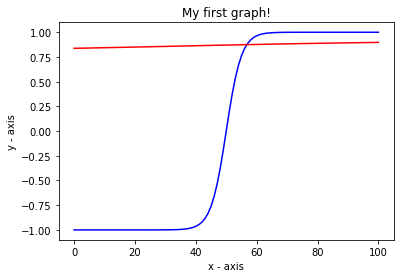

In [27]:
# x axis values 
x = imput
# corresponding y axis values 
y1 = output
y2 = yHat
  
# plotting the points  
plt.plot(y1, 'blue', y2, 'red') 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show()

## PSO

source: https://jamesmccaffrey.wordpress.com/2015/06/09/particle-swarm-optimization-using-python/


source: https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6

In [9]:
class PSO:
    
    def __init__(self, n_networks):
        self.n_networks = n_networks
        self.networks = []
        self.global_best_value = float("inf")
        self.global_best_position = SimplifiedNeuralNetwork().getParams.shape
        
    def printParticles(self):
        for network in self.networks:
            print(network)
    
    def fitness(self, network):
        return network.fitness
    
    def set_personal_best(self):
        for network in self.networks:
            fitness_candidate = self.fitness(network)
            if(network.personal_best_value > fitness_candidate):
                network.personal_best_value = fitness_candidate
                network.personal_best_position = network.position 
    
    def set_global_best(self):
        for network in self.networks:
            best_fitness_candidate = self.fitness(network)
            if(self.global_best_value > best_fitness_candidate):
                self.global_best_value = best_fitness_candidate
                self.global_best_position = network.position
                
    def move_particles(self):
        W = 0.5 # Intertia
        c1 = 0.8 #Cognitive/personal velocity
        c2 = 0.9 # Social velocity
        
        for network in self.networks:
            new_velocity = (W*network.velocity) + (c1*random.random())*\
            (network.personal_best_position - network.position) + \
            (c1*random.random())*(self.global_best_position - network.position)
            network.velocity = new_velocity
            network.move()
    
    def optimise(self):
        for network in self.networks:
                w1 = network.position[:3]
                w2 = network.position[-3:]
                w1 = np.reshape(w1,(1,3)) # Hard coded dimensions
                w2 = np.reshape(w2,(3,1)) # Hard coded dimensions
                #Forward
                for col_val_x in df["x"]:
                    z2 = np.dot(col_val_x, w1)
                    a2 = network.a2_func(z2)
                    z3 = np.dot(a2, w2)
                    yHat = network.yHat_func(z3)
                    for col_val_y in df["y"]:
                        error = rmse(col_val_y,yHat)
                        network.fitness = error

In [10]:
num_networks = 10
n_iterations = 10


pso = PSO(num_networks)

particles_vector = [SimplifiedNeuralNetwork() for i in range(num_networks)]
particles_vector = feedForward(particles_vector)

pso.networks = particles_vector


iterations = 0

while(iterations < n_iterations) or (pso.global_best_value == 0):
    pso.set_personal_best()
    pso.set_global_best()    
    pso.move_particles()
    pso.optimise()
    
    iterations +=1
    
print(f"GlobalBest: {pso.global_best_position} iters: {iterations} GlobalBestVal: {pso.global_best_value}")
print("------------------------")
for network in pso.networks:
    print(f"{network.W1} Fit {network.fitness}")

GlobalBest: [0.33101181 0.88868459 0.88644021 1.59618357 1.98753365 2.20087311] iters: 10 GlobalBestVal: 0.00027340530441011257
------------------------
[[1.22657285 0.17812071 1.59548193]] Fit 0.002725249964813936
[[ 0.17850644  1.88074104 -1.16744397]] Fit 0.005221846144806808
[[ 0.084156   -0.13297753  0.98554636]] Fit 0.006483207883145048
[[-0.60459373 -0.31882316 -0.95915597]] Fit 0.003940476975114682
[[-0.44100182 -0.2525156   0.49337179]] Fit 0.0009819694977256654
[[ 2.08438918 -0.68976307  1.95156125]] Fit 0.003618187222350855
[[-0.21555801  0.80231694 -1.12816221]] Fit 0.00039357825397967616
[[-0.24114165  0.01964736 -0.57755684]] Fit 0.003449306678636632
[[-0.25351839 -1.47453117  0.89040387]] Fit 0.00039243107341135897
[[ 1.32203715 -0.54515654  1.04779545]] Fit 0.002234393218382813


<Figure size 640x480 with 1 Axes>